In [5]:
# 📊 Extraire bigrammes
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

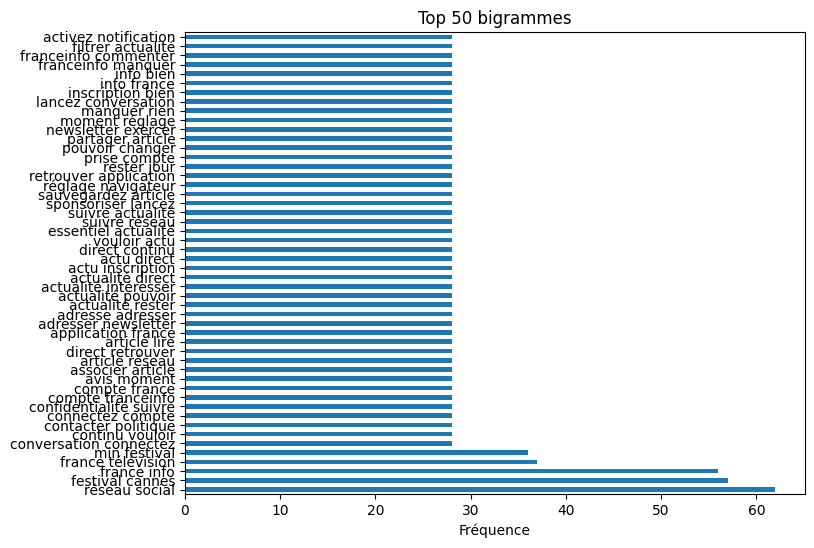

In [11]:
cleaned_docs= "../../data/clean"

# Charger tous les fichiers dans une liste
file_paths = glob.glob(os.path.join(cleaned_docs, "*.txt"))
documents = []
for path in file_paths:
    with open(path, encoding='utf-8') as f:
        documents.append(f.read())

# Vectorisation des bigrammes
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=50)
X = vectorizer.fit_transform(documents)

# Créer un DataFrame avec les fréquences de bigrammes
bigram_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Somme des fréquences sur tous les documents
bigram_freq_sum = bigram_freq.sum().sort_values(ascending=True)

# Affichage du top 20 bigrammes
bigram_freq_sum.plot(kind='barh', figsize=(8, 6), title="Top 50 bigrammes")
plt.gca().invert_yaxis()
plt.xlabel("Fréquence")

plt.savefig("../../figures/bigrammes.png", bbox_inches='tight')
plt.show()